## Bi-grams

### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
import string
import re
import unicodedata
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

### Load Data

In [2]:
review_data = pd.read_csv("./Data/review_chinsese_philadelphia.csv")

# removing the duplicates
review_data.drop_duplicates(subset=['review_id','date','user_id'],inplace=True)
review_data.set_index('Unnamed: 0')
review_data.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,1,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21
1,2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05
2,3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44
3,4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02
4,5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27


### Clean Data

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
token=[]
bigrm=[]
for comment in review_data.text:
    text=comment.lower()
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text=re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text=re.sub(r'https?://\S+|www\.\S+', '', text)
    text=re.sub(r'[^a-zA-Z]', ' ', text)
    text=re.sub(r'^\s*|\s\s*', ' ', text).strip()
    text=text.split()
    tokens=[lemmatizer.lemmatize(i) for i in text if (i not in string.punctuation)&(i not in stopwords)]
    token.append(tokens)
    tokens=list(nltk.bigrams(tokens))
    tokens=[i[0]+"_"+i[1] for i in tokens]
    bigrm.append(tokens)
review_data["unigram"]=token
review_data["bigram"]=bigrm

In [4]:
review_data.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,unigram,bigram
0,1,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21,"[look, like, second, red, king, restaurant, ch...","[look_like, like_second, second_red, red_king,..."
1,2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05,"[absolutely, wonderful, food, service, go, lun...","[absolutely_wonderful, wonderful_food, food_se..."
2,3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44,"[new, han, dynasty, took, spot, old, mid, atla...","[new_han, han_dynasty, dynasty_took, took_spot..."
3,4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02,"[awesome, food, great, place, split, bunch, de...","[awesome_food, food_great, great_place, place_..."
4,5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27,"[coming, place, year, even, though, live, colo...","[coming_place, place_year, year_even, even_tho..."


In [5]:
comm_clean=[]
for l in token:
    if l:
        comm=" ".join(l)
        comm_clean.append(comm)
comm_clean[0:5]

['look like second red king restaurant chinatown disappoint since place opened yesterday exactly sure replacing red king street second helping spicy szechuan food ordered takeout picked dan dan noodle shredded pork garlic sauce dish spice level dish perfect extremely mouth burning delicious flavor sweet earthy fresh portion generous make great leftover u wait try dish come back sit dinner also karaoke room upstairs plus byob',
 'absolutely wonderful food service go lunch dinner boyfriend least every two week price much reasonable weekend get pretty packed may wait little bit never issue u always get indian pancake hainanese chicken curry chicken dish delicious well never get tired',
 'new han dynasty took spot old mid atlantic restaurant unchanging menu like han dynasty lot one olde city even give maybe biased love service always nice came check make small conversation heard peanut allergy even though peanut dish ordered think han sister han dynasty time month number time note though d

## Tf-idf

In [6]:
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
TFIDF = tfidf.fit_transform(comm_clean)

In [7]:
word = tfidf.get_feature_names_out()

### Distribution of All Non-zero Scores

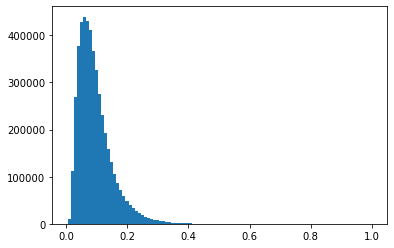

In [8]:
A = csr_matrix(TFIDF)
plt.hist(A.data, bins = 100)
plt.show()

## LDA Model Implementation

In [9]:
from gensim import corpora
import pickle
import gensim
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim_models
import os

In [10]:
review_data["text_data"]=review_data["unigram"]+review_data["bigram"]

In [11]:
dictionary=corpora.Dictionary(review_data["text_data"])
corpus=[dictionary.doc2bow(text) for text in review_data["text_data"]]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [12]:
## save the dictionary and corpus for future use
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [13]:
# parallelized Latent Dirichlet Allocation
num_topics=3
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

In [14]:
# save&load the model
lda_model.save('model3.gensim')
# from gensim import models
# lda_model = models.ldamodel.LdaModel.load('model3.gensim')

In [15]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: place|food|good|soup|noodle|great|time|dish|restaurant|like
Topic: 1 
Words: food|good|place|great|one|chicken|like|get|time|noodle
Topic: 2 
Words: food|place|good|great|like|time|restaurant|service|noodle|chinese


### Visualization

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.getcwd()
LDAvis_data_filepath+="\\Results\\LDA\\ldavis_prepared_"
LDAvis_data_filepath+=str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.006997 -0.000030       1        1  47.060527
2      0.003527 -0.005388       2        1  34.065964
1      0.003469  0.005418       3        1  18.873509, topic_info=         Term          Freq         Total Category  logprob  loglift
32       food  42518.000000  42518.000000  Default  30.0000  30.0000
236      good  27231.000000  27231.000000  Default  29.0000  29.0000
130   chicken  12992.000000  12992.000000  Default  28.0000  28.0000
290       one  15017.000000  15017.000000  Default  27.0000  27.0000
1612   philly   6750.000000   6750.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
815      soup   2208.866469  16706.383058   Topic3  -6.2435  -0.3559
114         u   1631.840201   8969.798926   Topic3  -6.5463  -0.0367
651      rice   1681.548570  10109.369535   Topic3  -6.5163  -0.1263
176   service   1915.365121  15385.810410   Topic3  -6.3861  -0.4161
65    ordered   1690.775671  11933.710181   Topic3  -6.5108  -0.2868

[292 rows x 6 columns], token_table=         Topic      Freq          Term
term                                  
0            1  0.449601          also
0            2  0.380007          also
0            3  0.170356          also
1010971      2  0.911818  also_tourist
124          1  0.443099        always
...        ...       ...           ...
836          1  0.505079         would
836          2  0.305387         would
836          3  0.189477         would
359686       1  0.487860   zhi_exactly
359686       3  0.487860   zhi_exactly

[474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### Customized LDA Model for Selected Business
#### Use the Business with most reviews as an example

In [19]:
df = review_data.groupby(['business_id'])['text_data'].count().sort_values(ascending=False)
df
busid = df.index[0]

In [20]:
df = review_data.loc[review_data['business_id'] == busid]
dictionary=corpora.Dictionary(df["text_data"])
corpus=[dictionary.doc2bow(text) for text in df["text_data"]]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [21]:
# parallelized Latent Dirichlet Allocation
num_topics=3
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.getcwd()
LDAvis_data_filepath+="\\Results\\LDA\\ldavis_prepared_"
LDAvis_data_filepath+=str(num_topics)
LDAvis_data_filepath+=busid
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) + busid + '.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004500  0.007482       1        1  39.384074
1     -0.004947 -0.007250       2        1  37.465454
0      0.009447 -0.000233       3        1  23.150471, topic_info=            Term         Freq        Total Category  logprob  loglift
70           one  1331.000000  1331.000000  Default  30.0000  30.0000
0           food  3600.000000  3600.000000  Default  29.0000  29.0000
106         best   901.000000   901.000000  Default  28.0000  28.0000
7           love  1280.000000  1280.000000  Default  27.0000  27.0000
631         like  1087.000000  1087.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
374      reading   243.535660  1445.634315   Topic3  -6.0909  -0.3179
1098        also   174.406226   833.455710   Topic3  -6.4247  -0.1010
389     sandwich   175.737950   868.603527   Topic3  -6.4171  -0.1347
766   everything   171.347565   898.363347   Topic3  -6.4424  -0.1937
138          eat   166.375698  1096.558336   Topic3  -6.4719  -0.4225

[292 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1098       1  0.389943     also
1098       2  0.400741     also
1098       3  0.208769     also
655        1  0.453845  amazing
655        2  0.391553  amazing
...      ...       ...      ...
1315       3  0.148917      wow
42005      1  0.228078  wow_wow
42005      2  0.684235  wow_wow
42005      3  0.114039  wow_wow
36654      1  0.809956      yiu

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])